<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li><li><span><a href="#Regular-Profit" data-toc-modified-id="Regular-Profit-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Regular Profit</a></span></li><li><span><a href="#Charging-Stations" data-toc-modified-id="Charging-Stations-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Charging Stations</a></span></li></ul></li><li><span><a href="#Baseline-Charging" data-toc-modified-id="Baseline-Charging-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baseline Charging</a></span></li><li><span><a href="#Intraday" data-toc-modified-id="Intraday-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intraday</a></span><ul class="toc-item"><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Risk-Averse-(r=0.3,-acc=90)" data-toc-modified-id="Risk-Averse-(r=0.3,-acc=90)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Risk Averse (r=0.3, acc=90)</a></span></li></ul></li><li><span><a href="#Balancing" data-toc-modified-id="Balancing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Balancing</a></span><ul class="toc-item"><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Risk-Averse-(r=0.5,-acc=70)" data-toc-modified-id="Risk-Averse-(r=0.5,-acc=70)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Risk Averse (r=0.5, acc=70)</a></span></li></ul></li><li><span><a href="#Integrated" data-toc-modified-id="Integrated-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integrated</a></span><ul class="toc-item"><li><span><a href="#Risk-Averse-(r=0.5,0.3,-acc=70,90)" data-toc-modified-id="Risk-Averse-(r=0.5,0.3,-acc=70,90)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Risk Averse (r=0.5,0.3, acc=70,90)</a></span></li><li><span><a href="#Risk-Seeking-(r=0.2,0.00,-acc=70,90)" data-toc-modified-id="Risk-Seeking-(r=0.2,0.00,-acc=70,90)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Risk Seeking (r=0.2,0.00, acc=70,90)</a></span></li><li><span><a href="#RL-(acc=50,60)" data-toc-modified-id="RL-(acc=50,60)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RL (acc=50,60)</a></span></li><li><span><a href="#RL-(acc=70,90)" data-toc-modified-id="RL-(acc=70,90)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>RL (acc=70,90)</a></span></li><li><span><a href="#RL-(acc=80,95)" data-toc-modified-id="RL-(acc=80,95)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>RL (acc=80,95)</a></span></li><li><span><a href="#RL-(acc=90,99)" data-toc-modified-id="RL-(acc=90,99)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>RL (acc=90,99)</a></span></li><li><span><a href="#RL-(acc=100,100)" data-toc-modified-id="RL-(acc=100,100)-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>RL (acc=100,100)</a></span></li></ul></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Style" data-toc-modified-id="Style-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Style</a></span></li><li><span><a href="#Fleet-Utilization" data-toc-modified-id="Fleet-Utilization-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fleet Utilization</a></span></li></ul></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from evsim.data import load

In [3]:
pd.set_option('display.float_format', '{:.4f}'.format)

start = "2016-06-01"
end = "2018-01-01"

def read_results(path):
    df = pd.read_csv(path)
    df["timestamp"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
    df = df.set_index("timestamp") 
    df = df[start:end]
    return df

## Regular Profit

In [4]:
df_car2go = pd.read_pickle("../data/processed/trips_big.pkl")
df_car2go["end_time"] = df_car2go["end_time"].apply(lambda x : datetime.fromtimestamp(x))
df_car2go = df_car2go.set_index("end_time")
df_car2go = df_car2go[start:end]
df_car2go["trip_price"].sum()/1000

17707.869599999995

## Charging Stations

In [5]:
df_c = df_car2go.loc[df_car2go["end_charging"] == 1, ["end_lat", "end_lon"]].round(3)
df_c["stations"] = df_c["end_lat"].astype(str) + ";" + df_c["end_lon"].astype(str)
len(df_c["stations"].unique())

1858

# Baseline Charging

In [6]:
df = read_results("../results/baseline.csv")
df.sum()/1000

charged_regular_kwh   2080.4895
charged_vpp_kwh          0.0000
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur               0.0000
dtype: float64

# Intraday

## Benchmark

In [7]:
df_i = read_results("../results/intraday-benchmark.csv")
df_i.sum()/1000

charged_regular_kwh    619.0956
charged_vpp_kwh       1461.3939
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              65.6227
dtype: float64

## Risk Averse (r=0.3, acc=90)

In [8]:
df_i = read_results("../results/intraday-risk-averse.csv")
print(df_i.sum()/1000)
profit_intr = df_i["profit_eur"].sum() / 1000

charged_regular_kwh   1095.8454
charged_vpp_kwh        984.6441
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              45.0835
dtype: float64


# Balancing

## Benchmark

In [9]:
df_b = read_results("../results/balancing-benchmark.csv")
df_b.sum()/1000

charged_regular_kwh    62.7264
charged_vpp_kwh       302.7240
imbalance_kwh           0.0000
lost_rentals_eur        0.1956
lost_rentals_nb         0.0010
profit_eur             16.4579
dtype: float64

## Risk Averse (r=0.5, acc=70)

In [10]:
df_b = read_results("../results/balancing-risk-averse.csv")
print(df_b.sum()/1000)
profit_bal = df_b["profit_eur"].sum() / 1000

charged_regular_kwh   1277.9280
charged_vpp_kwh        802.5615
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              43.6228
dtype: float64


# Integrated

In [11]:
df_in = read_results("../results/integrated-benchmark.csv")
print(df_in.sum()/1000)
profit_bench = df_in["profit_eur"].sum() / 1000


charged_regular_kwh    196.8210
charged_vpp_kwh       1883.6685
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              99.1283
dtype: float64


In [12]:
df_in = read_results("../results/integrated-benchmark-acc-1.csv")
print(df_in.sum()/1000)
profit_bench = df_in["profit_eur"].sum() / 1000


charged_regular_kwh    607.7925
charged_vpp_kwh       1472.6970
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              77.3565
dtype: float64


## Risk Averse (r=0.5,0.3, acc=70,90)

In [13]:
df_in = read_results("../results/integrated-risk-averse.csv")
print(df_in.sum()/1000)
profit_in = df_in["profit_eur"].sum() / 1000

charged_regular_kwh    788.5719
charged_vpp_kwh       1291.9176
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              67.0389
dtype: float64


## Risk Seeking (r=0.2,0.00, acc=70,90)

In [14]:
df_in = read_results("../results/integrated-risk-seeking.csv")
df_in.sum()/1000

charged_regular_kwh    400.8096
charged_vpp_kwh       1681.9659
imbalance_kwh            1.0224
lost_rentals_eur        15.4680
lost_rentals_nb          1.2370
profit_eur              87.9834
dtype: float64

## RL (acc=50,60)

In [15]:
df_rl = read_results("../results/accuracy/DDDQN-50-60_result.csv")
print(df_rl.sum()/1000)
profit_rl = df_rl["profit_eur"].sum() / 1000
print("Risk factors - Balancing: {:.2f}. Intraday:{:.2f}".format(df_rl["risk_bal"].mean(), df_rl["risk_intr"].mean()))

print("Profit comparison - Balancing: {:+.0%}, Intraday: {:+.0%}, Integrated: {:+.0%}, , Benchmark: {:+.0%}".format(
            profit_rl / profit_bal,
            profit_rl / profit_intr,
            profit_rl / profit_in,
            profit_rl / profit_bench
            )

     )

charged_regular_kwh   1179.3222
charged_vpp_kwh        901.1673
imbalance_kwh            0.0009
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              48.3246
risk_bal                50.1156
risk_intr              167.0520
dtype: float64
Risk factors - Balancing: 0.30. Intraday:1.00
Profit comparison - Balancing: +111%, Intraday: +107%, Integrated: +72%, , Benchmark: +62%


## RL (acc=70,90)

In [16]:
df_rl = read_results("../results/accuracy/DDDQN-70-90_result.csv")
#df_rl = read_results("~/Downloads/DDDQN-70-90_result.csv")
print(df_rl.sum()/1000)
profit_rl = df_rl["profit_eur"].sum() / 1000
print("Risk factors - Balancing: {:.2f}. Intraday:{:.2f}".format(df_rl["risk_bal"].mean(), df_rl["risk_intr"].mean()))

print("Profit comparison - Balancing: {:+.0%}, Intraday: {:+.0%}, Integrated: {:+.0%}, , Benchmark: {:+.0%}".format(
            profit_rl / profit_bal,
            profit_rl / profit_intr,
            profit_rl / profit_in,
            profit_rl / profit_bench
            )
      )

charged_regular_kwh    618.9282
charged_vpp_kwh       1461.5613
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              74.9090
risk_bal                83.5260
risk_intr               25.0578
dtype: float64
Risk factors - Balancing: 0.50. Intraday:0.15
Profit comparison - Balancing: +172%, Intraday: +166%, Integrated: +112%, , Benchmark: +97%


## RL (acc=80,95)

In [17]:
df_rl = read_results("../results/accuracy/DDDQN-80-95_result.csv")
print(df_rl.sum()/1000)
profit_rl = df_rl["profit_eur"].sum() / 1000
print("Risk factors - Balancing: {:.2f}. Intraday:{:.2f}".format(df_rl["risk_bal"].mean(), df_rl["risk_intr"].mean()))

print("Profit comparison - Balancing: {:+.0%}, Intraday: {:+.0%}, Integrated: {:+.0%}, , Benchmark: {:+.0%}".format(
            profit_rl / profit_bal,
            profit_rl / profit_intr,
            profit_rl / profit_in,
            profit_rl / profit_bench
            )
      )

charged_regular_kwh    599.6052
charged_vpp_kwh       1480.8843
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              79.0865
risk_bal                33.4104
risk_intr               75.1734
dtype: float64
Risk factors - Balancing: 0.20. Intraday:0.45
Profit comparison - Balancing: +181%, Intraday: +175%, Integrated: +118%, , Benchmark: +102%


## RL (acc=90,99)

In [18]:
df_rl = read_results("../results/accuracy/DDDQN-90-99_result.csv")
print(df_rl.sum()/1000)
profit_rl = df_rl["profit_eur"].sum() / 1000
print("Risk factors - Balancing: {:.2f}. Intraday:{:.2f}".format(df_rl["risk_bal"].mean(), df_rl["risk_intr"].mean()))

print("Profit comparison - Balancing: {:+.0%}, Intraday: {:+.0%}, Integrated: {:+.0%}, , Benchmark: {:+.0%}".format(
            profit_rl / profit_bal,
            profit_rl / profit_intr,
            profit_rl / profit_in,
            profit_rl / profit_bench
            )
      )

charged_regular_kwh    555.7428
charged_vpp_kwh       1524.7467
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              81.0109
risk_bal                41.7630
risk_intr               58.4682
dtype: float64
Risk factors - Balancing: 0.25. Intraday:0.35
Profit comparison - Balancing: +186%, Intraday: +180%, Integrated: +121%, , Benchmark: +105%


## RL (acc=100,100)

In [19]:
df_rl = read_results("../results/accuracy/DDDQN-100-100_result.csv")
print(df_rl.sum()/1000)
profit_rl = df_rl["profit_eur"].sum() / 1000
print("Risk factors - Balancing: {:.2f}. Intraday:{:.2f}".format(df_rl["risk_bal"].mean(), df_rl["risk_intr"].mean()))

print("Profit comparison - Balancing: {:+.0%}, Intraday: {:+.0%}, Integrated: {:+.0%}, , Benchmark: {:+.0%}".format(
            profit_rl / profit_bal,
            profit_rl / profit_intr,
            profit_rl / profit_in,
            profit_rl / profit_bench
            )
      )

charged_regular_kwh    257.3739
charged_vpp_kwh       1823.1156
imbalance_kwh            0.0000
lost_rentals_eur         0.0000
lost_rentals_nb          0.0000
profit_eur              96.2450
risk_bal                 6.2640
risk_intr               18.7938
dtype: float64
Risk factors - Balancing: 0.04. Intraday:0.11
Profit comparison - Balancing: +221%, Intraday: +213%, Integrated: +144%, , Benchmark: +124%


# Plots

## Style

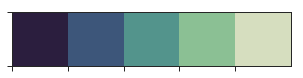

In [20]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1.5, "lines.markersize": 7})

sns.set_style("white")
sns.set_style("ticks")

palette = sns.cubehelix_palette(5, start=.5, rot=-.75, reverse=True)
sns.set_palette(palette)

sns.palplot(palette)

## Fleet Utilization

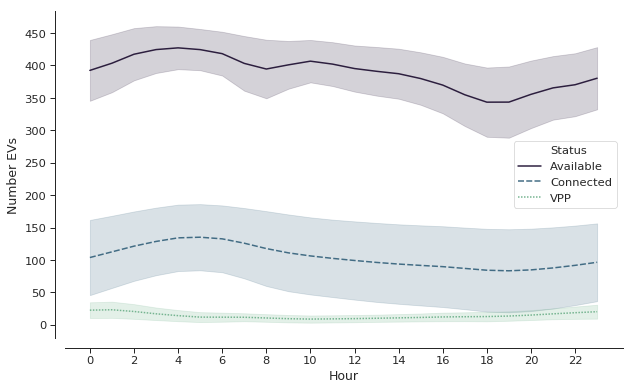

In [30]:
df_stats = read_results("../results/stats-baseline.csv")

df_stats = df_stats[["available_evs", "charging_evs", "vpp_evs"]]
df_stats.columns = ["Available", "Connected", "VPP"]

x = "Hour"
value_name = "Number EVs"
var_name = "Status"

df_stats[x] = df_stats.index.hour
df_stats = pd.melt(df_stats, id_vars=x, var_name=var_name, value_name=value_name) 

sns.set_palette(sns.cubehelix_palette(4, start=.5, rot=-.75, reverse=True))
sns.lineplot(x=x, y=value_name, hue=var_name, style=var_name, ci="sd", markers=False, data=df_stats)

sns.despine(offset=10)
plt.xticks(np.arange(0, 24, 2));
plt.yticks(np.arange(0, 500, 50));